#Yilun Wang(yilun830@bu.edu) - ASSIGNMENT #2


*   Use this template to start working on Assignment #2.
*   Follow the insutructions listed in "Assignment #2" under the **Assignments** tab on the BA870 site on QuestromTools.


# convert notebook to html then print as PDF



In [ ]:
!jupyter nbconvert --to html /content/BA870_Assignment2_Yilun_Wang.ipynb


[NbConvertApp] WARNING | pattern '/content/BA870_Assignment2_Yilun_Wang.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ

### Import packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns
#import winsorize
from scipy.stats.mstats import winsorize

# Model preparation

## Basic Info about the Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-session02/main/assignment2.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TICKER             354 non-null    object 
 1   CURRENT ASSETS     352 non-null    float64
 2   TOTAL ASSETS       354 non-null    float64
 3   EBIT               354 non-null    float64
 4   CURRENT LIABIL     353 non-null    float64
 5   TOTAL LIABILITIES  354 non-null    float64
 6   RETAINED EARNINGS  354 non-null    float64
 7   TOTAL SALES        354 non-null    float64
 8   CREDIT_RATING      354 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 25.0+ KB


In [ ]:
data.head(5)

,TICKER,CURRENT ASSETS,TOTAL ASSETS,EBIT,CURRENT LIABIL,TOTAL LIABILITIES,RETAINED EARNINGS,TOTAL SALES,CREDIT_RATING
0,ARXX,328.354,638.022,47.473,119.215,150.352,95.273,551.846,7
1,ABT,11281.883,36178.172,4860.219,11951.195,22123.986,9958.494,22476.322,19
2,AMD,3963.000,13147.000,401.000,2852.000,7072.000,464.000,5649.000,7
3,APD,2612.600,11180.700,1013.500,2323.400,6078.700,5521.800,8850.400,16
4,HON,12304.000,30941.000,3544.000,10135.000,21221.000,11256.000,31367.000,16


In [ ]:
# import PRCC_C & CSHO data
data2 = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-session02/main/variables.csv')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     344 non-null    int64  
 1   datadate  344 non-null    int64  
 2   fyear     344 non-null    int64  
 3   indfmt    344 non-null    object 
 4   consol    344 non-null    object 
 5   popsrc    344 non-null    object 
 6   datafmt   344 non-null    object 
 7   tic       344 non-null    object 
 8   curcd     344 non-null    object 
 9   ceq       344 non-null    float64
 10  csho      344 non-null    float64
 11  ni        344 non-null    float64
 12  costat    344 non-null    object 
 13  prcc_c    333 non-null    float64
dtypes: float64(4), int64(3), object(7)
memory usage: 37.8+ KB


In [ ]:
data2.head(5)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ceq,csho,ni,costat,prcc_c
0,1056,20060630,2006,INDL,C,D,STD,ARXX,USD,487.670,75.270,26.959,I,11.72
1,1078,20061231,2006,INDL,C,D,STD,ABT,USD,14054.186,1537.243,1716.755,A,48.71
2,1161,20061231,2006,INDL,C,D,STD,AMD,USD,5785.000,547.000,-166.000,A,20.35
3,1209,20060930,2006,INDL,C,D,STD,APD,USD,4924.000,217.251,723.400,A,70.28
4,1300,20061231,2006,INDL,C,D,STD,HON,USD,9720.000,800.592,2083.000,A,45.24


In [ ]:
# rename column tic to TICKER
data2 = data2.rename(columns={'tic':'TICKER'})

In [ ]:
# merge two datasets 
df = pd.merge(data, data2, how='outer', on='TICKER')

In [ ]:
# delete useless columns
del df['gvkey']
del df['datadate']
del df['fyear']
del df['indfmt']
del df['consol']
del df['popsrc']
del df['datafmt']
del df['curcd']
del df['costat']

In [ ]:
df.head(5)

,TICKER,CURRENT ASSETS,TOTAL ASSETS,EBIT,CURRENT LIABIL,TOTAL LIABILITIES,RETAINED EARNINGS,TOTAL SALES,CREDIT_RATING,ceq,csho,ni,prcc_c
0,ARXX,328.354,638.022,47.473,119.215,150.352,95.273,551.846,7,487.670,75.270,26.959,11.72
1,ABT,11281.883,36178.172,4860.219,11951.195,22123.986,9958.494,22476.322,19,14054.186,1537.243,1716.755,48.71
2,AMD,3963.000,13147.000,401.000,2852.000,7072.000,464.000,5649.000,7,5785.000,547.000,-166.000,20.35
3,APD,2612.600,11180.700,1013.500,2323.400,6078.700,5521.800,8850.400,16,4924.000,217.251,723.400,70.28
4,HON,12304.000,30941.000,3544.000,10135.000,21221.000,11256.000,31367.000,16,9720.000,800.592,2083.000,45.24


### Deal with null values:

In [ ]:
# check null value
df.isna().sum()

TICKER                0
CURRENT ASSETS        2
TOTAL ASSETS          0
EBIT                  0
CURRENT LIABIL        1
TOTAL LIABILITIES     0
RETAINED EARNINGS     0
TOTAL SALES           0
CREDIT_RATING         0
ceq                  10
csho                 10
ni                   10
prcc_c               21
dtype: int64

In [ ]:
df.shape

(354, 13)

In [ ]:
# fill na with mean and dropna 
df["CURRENT ASSETS"].fillna(df["CURRENT ASSETS"].mean(),inplace=True)
df["CURRENT LIABIL"].fillna(df["CURRENT LIABIL"].mean(),inplace=True)
df.dropna(inplace=True)


In [ ]:
# check null value again
df.isna().sum()

TICKER               0
CURRENT ASSETS       0
TOTAL ASSETS         0
EBIT                 0
CURRENT LIABIL       0
TOTAL LIABILITIES    0
RETAINED EARNINGS    0
TOTAL SALES          0
CREDIT_RATING        0
ceq                  0
csho                 0
ni                   0
prcc_c               0
dtype: int64

In [ ]:
df.describe()

,CURRENT ASSETS,TOTAL ASSETS,EBIT,CURRENT LIABIL,TOTAL LIABILITIES,RETAINED EARNINGS,TOTAL SALES,CREDIT_RATING,ceq,csho,ni,prcc_c
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,4497.713730,13049.247916,1582.855138,3134.118965,7525.366003,4317.324291,12199.468586,12.198198,5392.897462,428.687703,1101.522102,40.548064
std,8741.047669,30080.692937,4579.799671,6902.587269,20472.141607,14591.483473,30773.691485,3.491349,12805.286756,896.948073,3465.375180,23.286578
min,77.343000,181.360000,-8167.000000,27.577000,48.123000,-7863.000000,84.209000,1.000000,-3465.000000,3.792000,-12613.000000,0.100000
25%,657.093000,1712.100000,130.325000,295.900000,911.200000,106.325000,1588.272000,9.000000,542.259000,53.697000,58.633000,22.230000
50%,1504.000000,3618.431000,365.320000,835.569000,2032.000000,781.891000,3671.100000,12.000000,1410.900000,109.880000,196.398000,37.140000
75%,4351.700000,10021.000000,1004.201000,2636.584000,6158.000000,2426.600000,9596.404000,15.000000,4365.000000,315.018000,607.000000,54.660000
max,75777.000000,278554.000000,56939.000000,75352.000000,280860.000000,192445.000000,335086.000000,22.000000,113844.000000,7124.000000,39500.000000,118.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 353
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TICKER             333 non-null    object 
 1   CURRENT ASSETS     333 non-null    float64
 2   TOTAL ASSETS       333 non-null    float64
 3   EBIT               333 non-null    float64
 4   CURRENT LIABIL     333 non-null    float64
 5   TOTAL LIABILITIES  333 non-null    float64
 6   RETAINED EARNINGS  333 non-null    float64
 7   TOTAL SALES        333 non-null    float64
 8   CREDIT_RATING      333 non-null    int64  
 9   ceq                333 non-null    float64
 10  csho               333 non-null    float64
 11  ni                 333 non-null    float64
 12  prcc_c             333 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 36.4+ KB


In [ ]:
df.head(5)

,TICKER,CURRENT ASSETS,TOTAL ASSETS,EBIT,CURRENT LIABIL,TOTAL LIABILITIES,RETAINED EARNINGS,TOTAL SALES,CREDIT_RATING,ceq,csho,ni,prcc_c
0,ARXX,328.354,638.022,47.473,119.215,150.352,95.273,551.846,7,487.670,75.270,26.959,11.72
1,ABT,11281.883,36178.172,4860.219,11951.195,22123.986,9958.494,22476.322,19,14054.186,1537.243,1716.755,48.71
2,AMD,3963.000,13147.000,401.000,2852.000,7072.000,464.000,5649.000,7,5785.000,547.000,-166.000,20.35
3,APD,2612.600,11180.700,1013.500,2323.400,6078.700,5521.800,8850.400,16,4924.000,217.251,723.400,70.28
4,HON,12304.000,30941.000,3544.000,10135.000,21221.000,11256.000,31367.000,16,9720.000,800.592,2083.000,45.24


## Adding ratios columns

Re-organize the columns

### calculations

In [ ]:
# log TOTAL ASSETS & TOTAL SALES
df['TOTAL ASSETS'] = np.log(df['TOTAL ASSETS'])
df['TOTAL SALES'] = np.log(df['TOTAL SALES'])

In [ ]:
df['ROA'] = df['EBIT']/df['TOTAL ASSETS']
df['Current Ratio'] = df['CURRENT ASSETS']/df['CURRENT LIABIL']
df['NET PROFIT MARGIN'] = df['EBIT'] / df['TOTAL SALES']

In [ ]:
# market value:
df['market value'] = df['prcc_c'] * df['csho']

In [ ]:
# price-to-sales ratio:
df['p/s_ratio'] = df['market value'] / df['TOTAL SALES']

In [ ]:
# p/e ratio
df['p/e_ratio'] = df['market value'] / df['ni']

In [ ]:
# m/b ratio
df['m/b_ratio'] = df['market value'] / df['ceq']

In [ ]:
df.head()

,TICKER,CURRENT ASSETS,TOTAL ASSETS,EBIT,CURRENT LIABIL,TOTAL LIABILITIES,RETAINED EARNINGS,TOTAL SALES,CREDIT_RATING,ceq,csho,ni,prcc_c,ROA,Current Ratio,NET PROFIT MARGIN,market value,p/s_ratio,p/e_ratio,m/b_ratio
0,ARXX,328.354,6.458373,47.473,119.215,150.352,95.273,6.313269,7,487.670,75.270,26.959,11.72,7.350613,2.754301,7.519559,882.16440,139.731793,32.722445,1.808937
1,ABT,11281.883,10.496211,4860.219,11951.195,22123.986,9958.494,10.020218,19,14054.186,1537.243,1716.755,48.71,463.045083,0.943996,485.041259,74879.10653,7472.802381,43.616653,5.327886
2,AMD,3963.000,9.483949,401.000,2852.000,7072.000,464.000,8.639234,7,5785.000,547.000,-166.000,20.35,42.281966,1.389551,46.416153,11131.45000,1288.476529,-67.056928,1.924192
3,APD,2612.600,9.321944,1013.500,2323.400,6078.700,5521.800,9.088218,16,4924.000,217.251,723.400,70.28,108.721953,1.124473,111.518012,15268.40028,1680.021363,21.106442,3.100812
4,HON,12304.000,10.339837,3544.000,10135.000,21221.000,11256.000,10.353512,16,9720.000,800.592,2083.000,45.24,342.752004,1.214011,342.299320,36218.78208,3498.212322,17.387797,3.726212


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 353
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TICKER             333 non-null    object 
 1   CURRENT ASSETS     333 non-null    float64
 2   TOTAL ASSETS       333 non-null    float64
 3   EBIT               333 non-null    float64
 4   CURRENT LIABIL     333 non-null    float64
 5   TOTAL LIABILITIES  333 non-null    float64
 6   RETAINED EARNINGS  333 non-null    float64
 7   TOTAL SALES        333 non-null    float64
 8   CREDIT_RATING      333 non-null    int64  
 9   ceq                333 non-null    float64
 10  csho               333 non-null    float64
 11  ni                 333 non-null    float64
 12  prcc_c             333 non-null    float64
 13  ROA                333 non-null    float64
 14  Current Ratio      333 non-null    float64
 15  NET PROFIT MARGIN  333 non-null    float64
 16  market value       333 non

## Check Outliers

### outliers for ROA:

count     333.000000
mean      152.035415
std       384.095796
min      -651.412682
25%        17.879442
50%        43.707471
75%       110.853527
max      4630.355686
Name: ROA, dtype: float64


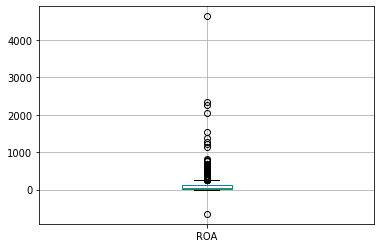

In [ ]:
print(df['ROA'].describe())
df.boxplot(column='ROA')


In [ ]:
# winsorize
df['ROA_win'] = winsorize(df['ROA'], (0.01,0.01))

In [ ]:
df['ROA_win'].describe()

count     333.000000
mean      144.762129
std       300.031980
min        -4.287101
25%        17.879442
50%        43.707471
75%       110.853527
max      2047.805277
Name: ROA_win, dtype: float64

### outliers for Current Ratio:

count    333.000000
mean       2.016033
std        1.114997
min        0.304163
25%        1.363975
50%        1.798826
75%        2.306078
max        9.643438
Name: Current Ratio, dtype: float64


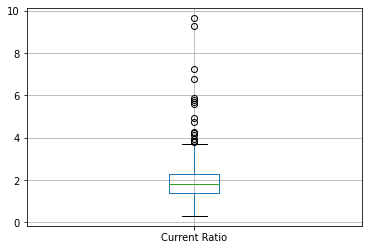

In [ ]:
print(df['Current Ratio'].describe())
df.boxplot(column='Current Ratio')

In [ ]:
# winsorize
df['Current_Ratio_win'] = winsorize(df['Current Ratio'], (0.01,0.01))

In [ ]:
df['Current_Ratio_win'].describe()

count    333.000000
mean       2.000952
std        1.012856
min        0.684313
25%        1.363975
50%        1.798826
75%        2.306078
max        6.795579
Name: Current_Ratio_win, dtype: float64

### outliers for NET PROFIT MARGIN:

count     333.000000
mean      152.861002
std       380.133358
min      -681.509189
25%        18.200166
50%        44.888661
75%       109.722297
max      4475.582633
Name: NET PROFIT MARGIN, dtype: float64


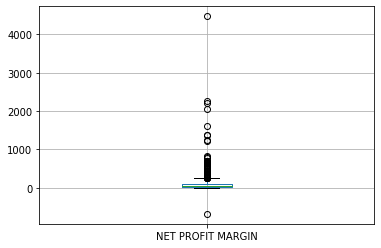

In [ ]:
print(df['NET PROFIT MARGIN'].describe())
df.boxplot(column='NET PROFIT MARGIN')

In [ ]:
# winsorize
df['net_profit_margin_win'] = winsorize(df['NET PROFIT MARGIN'], (0.01,0.01))

In [ ]:
df['net_profit_margin_win'].describe()

count     333.000000
mean      146.462374
std       303.776360
min        -3.958541
25%        18.200166
50%        44.888661
75%       109.722297
max      2044.939932
Name: net_profit_margin_win, dtype: float64

### outliers for ps_ratio :

count      333.000000
mean      1738.591246
std       3586.268544
min          0.042723
25%        222.628583
50%        502.108112
75%       1337.129328
max      34507.809530
Name: p/s_ratio, dtype: float64


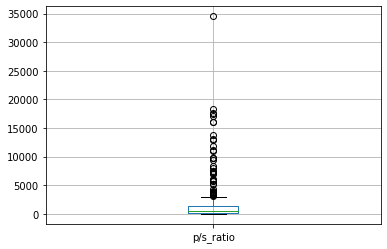

In [ ]:
print(df['p/s_ratio'].describe())
df.boxplot(column='p/s_ratio')

In [ ]:
# winsorize
df['p/s_ratio_win'] = winsorize(df['p/s_ratio'], (0.01,0.01))
df['p/s_ratio_win'].describe()

count      333.000000
mean      1684.581741
std       3205.375158
min         11.809683
25%        222.628583
50%        502.108112
75%       1337.129328
max      17468.113383
Name: p/s_ratio_win, dtype: float64

### outliers for p/e_ratio :

count     333.000000
mean       24.596344
std       226.128783
min      -964.287735
25%        11.061894
50%        17.281376
75%        22.270221
max      3953.541714
Name: p/e_ratio, dtype: float64


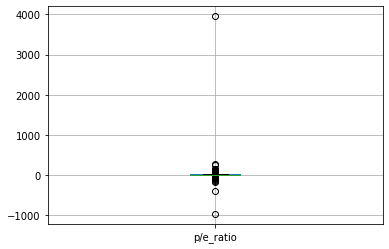

In [ ]:
print(df['p/e_ratio'].describe())
df.boxplot(column='p/e_ratio')

In [ ]:
# winsorize
df['p/e_ratio_win'] = winsorize(df['p/e_ratio'], (0.01,0.01))
df['p/e_ratio_win'].describe()

count    333.000000
mean      15.888862
std       32.199886
min     -137.967037
25%       11.061894
50%       17.281376
75%       22.270221
max      158.593060
Name: p/e_ratio_win, dtype: float64

### outliers for m/b_ratio :

count    333.000000
mean       3.715009
std       14.483983
min      -62.216453
25%        1.861362
50%        2.861326
75%        4.241607
max      246.084854
Name: m/b_ratio, dtype: float64


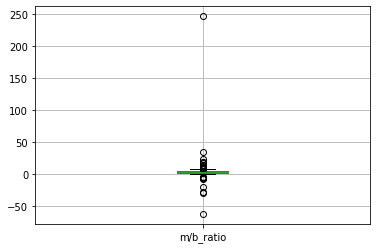

In [ ]:
print(df['m/b_ratio'].describe())
df.boxplot(column='m/b_ratio')

In [ ]:
# winsorize
df['m/b_ratio_win'] = winsorize(df['m/b_ratio'], (0.01,0.01))
df['m/b_ratio_win'].describe()

count    333.000000
mean       3.157035
std        4.003221
min      -19.768837
25%        1.861362
50%        2.861326
75%        4.241607
max       18.941696
Name: m/b_ratio_win, dtype: float64

### outliers for logged TOTAL ASSETS:

count    333.000000
mean       8.369707
std        1.409345
min        5.200484
25%        7.445476
50%        8.193796
75%        9.212438
max       12.537367
Name: TOTAL ASSETS, dtype: float64


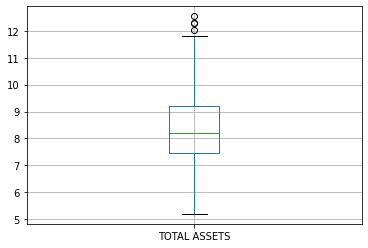

In [ ]:
print(df['TOTAL ASSETS'].describe())
df.boxplot(column='TOTAL ASSETS')

In [ ]:
# winsorize
df['TOTAL_ASSETS_win'] = winsorize(df['TOTAL ASSETS'], (0.01,0.01))
df['TOTAL_ASSETS_win'].describe()

count    333.000000
mean       8.367891
std        1.397265
min        5.478366
25%        7.445476
50%        8.193796
75%        9.212438
max       12.012373
Name: TOTAL_ASSETS_win, dtype: float64

### outliers for TOTAL SALES :

count    333.000000
mean       8.316679
std        1.405777
min        4.433302
25%        7.370402
50%        8.208247
75%        9.169144
max       12.722142
Name: TOTAL SALES, dtype: float64


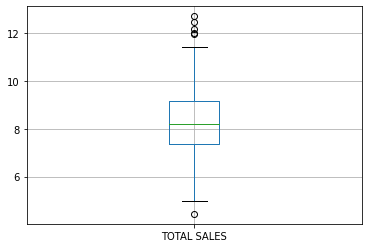

In [ ]:
print(df['TOTAL SALES'].describe())
df.boxplot(column='TOTAL SALES')

In [ ]:
# winsorize
df['TOTAL_SALES_win'] = winsorize(df['TOTAL SALES'], (0.01,0.01))
df['TOTAL_SALES_win'].describe()

count    333.000000
mean       8.315864
std        1.386860
min        5.205676
25%        7.370402
50%        8.208247
75%        9.169144
max       12.029204
Name: TOTAL_SALES_win, dtype: float64

# Linear regression

In [ ]:
df.head(5)

,TICKER,CURRENT ASSETS,TOTAL ASSETS,EBIT,CURRENT LIABIL,TOTAL LIABILITIES,RETAINED EARNINGS,TOTAL SALES,CREDIT_RATING,ceq,...,p/e_ratio,m/b_ratio,ROA_win,Current_Ratio_win,net_profit_margin_win,p/s_ratio_win,p/e_ratio_win,m/b_ratio_win,TOTAL_ASSETS_win,TOTAL_SALES_win
0,ARXX,328.354,6.458373,47.473,119.215,150.352,95.273,6.313269,7,487.670,...,32.722445,1.808937,7.350613,2.754301,7.519559,139.731793,32.722445,1.808937,6.458373,6.313269
1,ABT,11281.883,10.496211,4860.219,11951.195,22123.986,9958.494,10.020218,19,14054.186,...,43.616653,5.327886,463.045083,0.943996,485.041259,7472.802381,43.616653,5.327886,10.496211,10.020218
2,AMD,3963.000,9.483949,401.000,2852.000,7072.000,464.000,8.639234,7,5785.000,...,-67.056928,1.924192,42.281966,1.389551,46.416153,1288.476529,-67.056928,1.924192,9.483949,8.639234
3,APD,2612.600,9.321944,1013.500,2323.400,6078.700,5521.800,9.088218,16,4924.000,...,21.106442,3.100812,108.721953,1.124473,111.518012,1680.021363,21.106442,3.100812,9.321944,9.088218
4,HON,12304.000,10.339837,3544.000,10135.000,21221.000,11256.000,10.353512,16,9720.000,...,17.387797,3.726212,342.752004,1.214011,342.299320,3498.212322,17.387797,3.726212,10.339837,10.353512


In [ ]:
df['constant'] = 1
cols = ['CREDIT_RATING','ROA_win','Current_Ratio_win','net_profit_margin_win','p/s_ratio_win','p/e_ratio_win','m/b_ratio_win','TOTAL_ASSETS_win','TOTAL_SALES_win','constant']
df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 353
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CREDIT_RATING          333 non-null    int64  
 1   ROA_win                333 non-null    float64
 2   Current_Ratio_win      333 non-null    float64
 3   net_profit_margin_win  333 non-null    float64
 4   p/s_ratio_win          333 non-null    float64
 5   p/e_ratio_win          333 non-null    float64
 6   m/b_ratio_win          333 non-null    float64
 7   TOTAL_ASSETS_win       333 non-null    float64
 8   TOTAL_SALES_win        333 non-null    float64
 9   constant               333 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 28.6 KB


In [ ]:
X = df.drop(columns = 'CREDIT_RATING')
y = df['CREDIT_RATING']

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          CREDIT_RATING   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     50.51
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.39e-52
Time:                        01:59:30   Log-Likelihood:                -753.54
No. Observations:                 333   AIC:                             1525.
Df Residuals:                     324   BIC:                             1559.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ROA_win                   0.01

The results shows that only current ratio and net profit margin have negative coefficient with credit rating. All of other variables have positive coefficient. 

Besides, both of coefficient and t-value of current ratio and net profit margin are negative, which means bad. 

Next, only p/s ratio, p/e ratio, m/b ratio and total assets have p-value less than 0.05, which means statistically significant. 

Finally, R-square equals to 0.555 and adj R-square equals to 0.544 means the results is good enough because the values are more than 0.5.